<a href="https://colab.research.google.com/github/ErwanR123/School/blob/main/M1E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1 - Exercise 2: Gradient Descent

## Learning Objectives
- Implement gradient descent from scratch using NumPy
- Understand optimization trajectories and convergence behavior
- Visualize mathematical optimization concepts

## Test Framework Setup

In [1]:
# Clone the test repository
!git clone https://github.com/racousin/data_science_practice.git /tmp/tests 2>/dev/null || true

# Import required modules
import sys
sys.path.append('/tmp/tests/tests/python_deep_learning')

# Import the improved test utilities
from test_utils import NotebookTestRunner, create_inline_test
from module1.test_exercise2 import Exercise2Validator, EXERCISE2_SECTIONS

# Create test runner and validator
test_runner = NotebookTestRunner("module1", 2)
validator = Exercise2Validator()

## Environment Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List, Callable
from IPython.display import display, HTML

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

## Section 1: Function Definitions and Visualization

In this section, we'll define three functions to optimize and create visualization helpers to understand their landscapes.

### Function 1: Basic Convex Quadratic
$f(x) = x^2 + 2x + 1$

This is a simple parabola with global minimum at $x = -1$

In [6]:
# TODO: Implement function 1 and its gradient
# f(x) = x² + 2x + 1
# gradient: f'(x) = 2x + 2

def f1(x: float) -> float:
    """Basic convex quadratic function"""
    return (x**2+2*x+1)

def grad_f1(x: float) -> float:
    """Gradient of f1"""
    return (2*x+2)

# Display your functions
if f1 is not None and f1(0) is not None:
    print(f"f1(0) = {f1(0)}")
    print(f"f1(-1) = {f1(-1)} (should be minimum)")
    print(f"grad_f1(0) = {grad_f1(0)}")
    print(f"grad_f1(-1) = {grad_f1(-1)} (should be 0 at minimum)")

f1(0) = 1
f1(-1) = 0 (should be minimum)
grad_f1(0) = 2
grad_f1(-1) = 0 (should be 0 at minimum)


In [7]:
# Test Section 1: Function Definitions
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 1: Function Definitions"]]
test_runner.test_section("Section 1: Function Definitions", validator, section_tests, locals())


Testing: Section 1: Function Definitions
❌ Testing function 1 implementation: Unexpected error: Exercise2Validator.test_f1() missing 1 required positional argument: 'f1'
❌ Testing gradient of function 1: Unexpected error: Exercise2Validator.test_grad_f1() missing 1 required positional argument: 'grad_f1'
❌ Testing function 2 implementation: Unexpected error: Exercise2Validator.test_f2() missing 1 required positional argument: 'f2'
❌ Testing gradient of function 2: Unexpected error: Exercise2Validator.test_grad_f2() missing 1 required positional argument: 'grad_f2'
❌ Testing function 3 implementation: Unexpected error: Exercise2Validator.test_f3() missing 1 required positional argument: 'f3'
❌ Testing gradient of function 3: Unexpected error: Exercise2Validator.test_grad_f3() missing 1 required positional argument: 'grad_f3'

❌ Section 1: Function Definitions - Some tests failed. Review the errors above.


False

### Function 2: Non-Convex Cubic
$f(x) = x^3 - 3x^2 + 2$

This cubic function has both local maximum and minimum, demonstrating how starting points affect convergence.

In [34]:
# TODO: Implement function 2 and its gradient
# f(x) = x³ - 3x² + 2
# gradient: f'(x) = 3x² - 6x

def f2(x: float) -> float:
    """Non-convex cubic function"""
    return (x**3-3*x**2+2)

def grad_f2(x: float) -> float:
    """Gradient of f2"""
    return (3*x**2-6*x)

# Display your functions
if f2 is not None and f2(0) is not None:
    print(f"f2(0) = {f2(0)}")
    print(f"f2(2) = {f2(2)} (local minimum)")
    print(f"grad_f2(0) = {grad_f2(0)} (critical point)")
    print(f"grad_f2(2) = {grad_f2(2)} (should be 0)")

f2(0) = 2
f2(2) = -2 (local minimum)
grad_f2(0) = 0 (critical point)
grad_f2(2) = 0 (should be 0)


In [9]:
# Test Function 2
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 1: Function Definitions"] if "f2" in name]
test_runner.test_section("Function 2 Tests", validator, section_tests, locals())


Testing: Function 2 Tests
❌ Testing function 2 implementation: Unexpected error: Exercise2Validator.test_f2() missing 1 required positional argument: 'f2'
❌ Testing gradient of function 2: Unexpected error: Exercise2Validator.test_grad_f2() missing 1 required positional argument: 'grad_f2'

❌ Function 2 Tests - Some tests failed. Review the errors above.


False

### Function 3: 2D Convex Function
$f(x,y) = x^2 + 2y^2 + 2x - 4y + 5$

This 2D function lets us practice with vector gradients. Minimum at $(-1, 1)$.

In [10]:
# TODO: Implement function 3 and its gradient
# f(x,y) = x² + 2y² + 2x - 4y + 5
# gradient: ∇f = [2x + 2, 4y - 4]

def f3(point: np.ndarray) -> float:
    """2D convex function
    Args:
        point: numpy array of shape (2,) containing [x, y]
    Returns:
        Function value at the point
    """
    x, y = point
    return x**2+2*y**2+2*x-4*y+5

def grad_f3(point: np.ndarray) -> np.ndarray:
    """Gradient of f3
    Args:
        point: numpy array of shape (2,) containing [x, y]
    Returns:
        Gradient vector of shape (2,)
    """
    x, y = point
    return [2*x + 2, 4*y - 4]

# Display your functions
if f3 is not None and f3(np.array([0, 0])) is not None:
    print(f"f3([0, 0]) = {f3(np.array([0, 0]))}")
    print(f"f3([-1, 1]) = {f3(np.array([-1, 1]))} (should be minimum)")
    print(f"grad_f3([0, 0]) = {grad_f3(np.array([0, 0]))}")
    print(f"grad_f3([-1, 1]) = {grad_f3(np.array([-1, 1]))} (should be [0, 0])")

f3([0, 0]) = 5
f3([-1, 1]) = 2 (should be minimum)
grad_f3([0, 0]) = [np.int64(2), np.int64(-4)]
grad_f3([-1, 1]) = [np.int64(0), np.int64(0)] (should be [0, 0])


In [11]:
# Test Function 3
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 1: Function Definitions"] if "f3" in name]
test_runner.test_section("Function 3 Tests", validator, section_tests, locals())


Testing: Function 3 Tests
❌ Testing function 3 implementation: Unexpected error: Exercise2Validator.test_f3() missing 1 required positional argument: 'f3'
❌ Testing gradient of function 3: Unexpected error: Exercise2Validator.test_grad_f3() missing 1 required positional argument: 'grad_f3'

❌ Function 3 Tests - Some tests failed. Review the errors above.


False

## Section 2: Visualization Helpers

Let's create functions to visualize our optimization landscapes and trajectories.

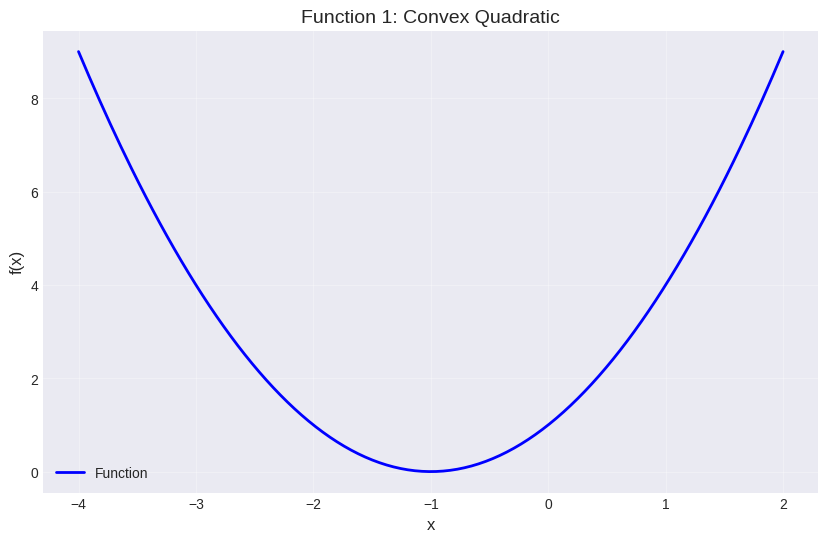

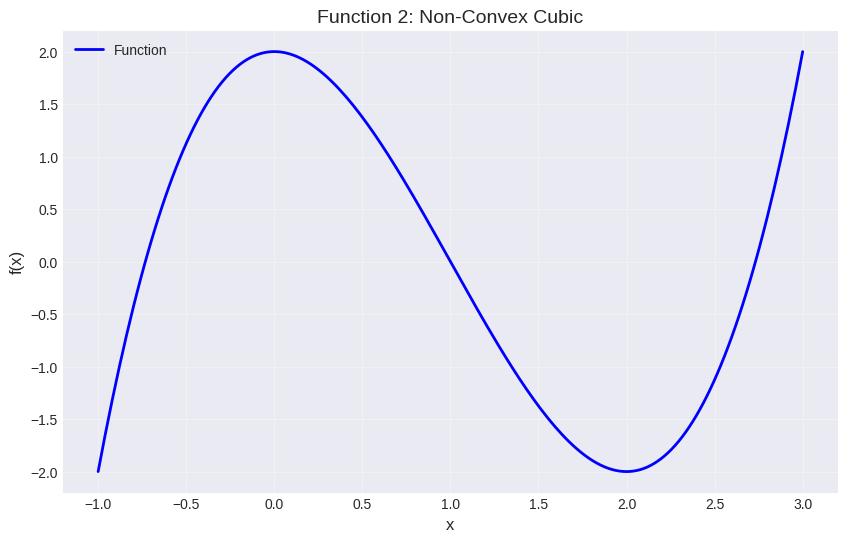

/tmp/ipython-input-380676699.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


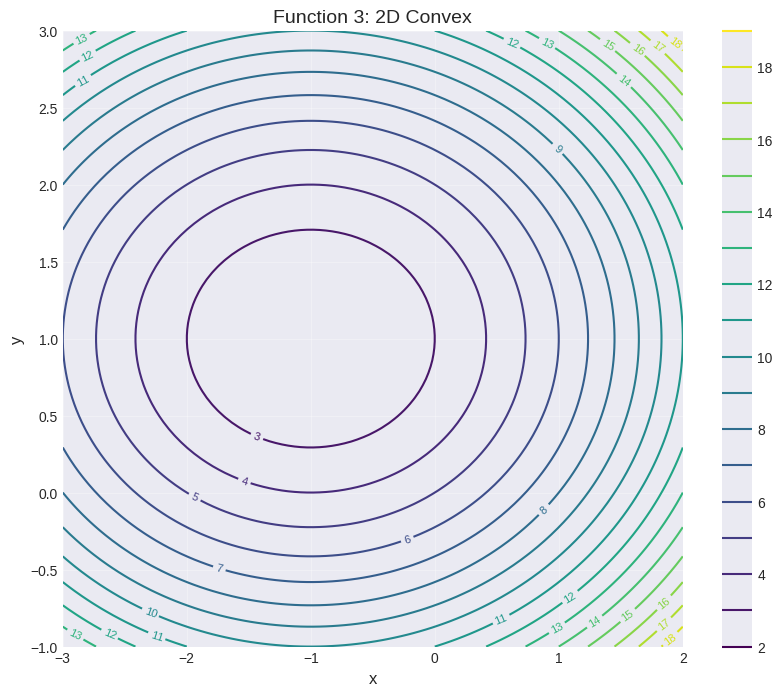

In [12]:
def plot_1d_function(f: Callable, x_range: Tuple[float, float],
                     trajectory: List[float] = None, title: str = ""):
    """Plot a 1D function and optionally show optimization trajectory"""
    x = np.linspace(x_range[0], x_range[1], 200)
    y = [f(xi) for xi in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label='Function')

    if trajectory:
        traj_y = [f(xi) for xi in trajectory]
        plt.plot(trajectory, traj_y, 'ro-', markersize=8, linewidth=1.5,
                alpha=0.7, label='Optimization path')
        plt.plot(trajectory[0], traj_y[0], 'go', markersize=12, label='Start')
        plt.plot(trajectory[-1], traj_y[-1], 'r*', markersize=15, label='End')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

def plot_2d_function(f: Callable, x_range: Tuple[float, float],
                     y_range: Tuple[float, float], trajectory: np.ndarray = None,
                     title: str = ""):
    """Plot a 2D function as contour plot with optional trajectory"""
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))

    plt.figure(figsize=(10, 8))
    contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
    plt.clabel(contour, inline=True, fontsize=8)
    plt.colorbar(contour)

    if trajectory is not None and len(trajectory) > 0:
        plt.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', markersize=8,
                linewidth=2, alpha=0.7, label='Optimization path')
        plt.plot(trajectory[0, 0], trajectory[0, 1], 'go', markersize=12, label='Start')
        plt.plot(trajectory[-1, 0], trajectory[-1, 1], 'r*', markersize=15, label='End')

    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

# Visualize all three functions
if f1 is not None and f1(0) is not None:
    plot_1d_function(f1, (-4, 2), title="Function 1: Convex Quadratic")
if f2 is not None and f2(0) is not None:
    plot_1d_function(f2, (-1, 3), title="Function 2: Non-Convex Cubic")
if f3 is not None and f3(np.array([0, 0])) is not None:
    plot_2d_function(f3, (-3, 2), (-1, 3), title="Function 3: 2D Convex")

## Section 3: Gradient Descent Implementation

Now let's implement the gradient descent algorithm for both 1D and multi-dimensional functions.

In [20]:
# TODO: Implement gradient descent for 1D functions
def gradient_descent_1d(f: Callable, grad_f: Callable, x0: float,
                        learning_rate: float, n_iterations: int) -> Tuple[float, List[float]]:
    """
    Gradient descent for 1D functions

    Args:
        f: Function to minimize
        grad_f: Gradient of the function
        x0: Starting point
        learning_rate: Step size for updates
        n_iterations: Number of iterations

    Returns:
        Tuple of (final_x, trajectory)
        - final_x: Final position after optimization
        - trajectory: List of x values at each iteration
    """
    trajectory = [x0]
    x = x0

    # TODO: Implement the gradient descent loop
    # For each iteration:
    #   1. Compute gradient at current position
    #   2. Update position: x = x - learning_rate * gradient
    #   3. Store new position in trajectory
    for i in range(n_iterations):
      x=x-learning_rate*grad_f(x)
      trajectory.append(x)

    return x, trajectory

# Test gradient descent on Function 1
if gradient_descent_1d is not None and f1 is not None:
    result_1d, trajectory_1d = gradient_descent_1d(f1, grad_f1, x0=2.0,
                                                   learning_rate=0.1, n_iterations=50)
    if result_1d is not None:
        print(f"Starting point: 2.0")
        print(f"Final point: {result_1d:.4f}")
        print(f"Expected minimum: -1.0")
        print(f"Number of steps: {len(trajectory_1d)}")

Starting point: 2.0
Final point: -1.0000
Expected minimum: -1.0
Number of steps: 51


In [21]:
# Test Section 3: Gradient Descent 1D
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 3: Gradient Descent 1D"]]
test_runner.test_section("Section 3: Gradient Descent 1D", validator, section_tests, locals())


Testing: Section 3: Gradient Descent 1D
❌ Testing 1D gradient descent implementation: Unexpected error: Exercise2Validator.test_gradient_descent_1d() missing 1 required positional argument: 'gradient_descent_1d'
❌ Testing convergence on function 1: Unexpected error: Exercise2Validator.test_result_1d() missing 2 required positional arguments: 'result_1d' and 'trajectory_1d'

❌ Section 3: Gradient Descent 1D - Some tests failed. Review the errors above.


False

In [28]:
# TODO: Implement gradient descent for multi-dimensional functions
def gradient_descent_nd(f: Callable, grad_f: Callable, x0: np.ndarray,
                        learning_rate: float, n_iterations: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Gradient descent for n-dimensional functions

    Args:
        f: Function to minimize
        grad_f: Gradient of the function
        x0: Starting point (numpy array)
        learning_rate: Step size for updates
        n_iterations: Number of iterations

    Returns:
        Tuple of (final_x, trajectory)
        - final_x: Final position after optimization
        - trajectory: Array of positions at each iteration (shape: [n_iterations+1, n_dims])
    """
    trajectory = [x0.copy()]
    x = x0.copy()

    # TODO: Implement the gradient descent loop
    # For each iteration:
    #   1. Compute gradient at current position
    #   2. Update position: x = x - learning_rate * gradient
    #   3. Store new position in trajectory
    for i in range(n_iterations):
      x=x-learning_rate*grad_f(x)
      trajectory.append(x.copy())

    return x, np.vstack(trajectory)

# Test gradient descent on Function 3 (2D)
if gradient_descent_nd is not None and f3 is not None:
    result_nd, trajectory_nd = gradient_descent_nd(f3, grad_f3,
                                                   x0=np.array([2.0, 2.0]),
                                                   learning_rate=0.1,
                                                   n_iterations=50)
    if result_nd is not None:
        print(f"Starting point: [2.0, 2.0]")
        print(f"Final point: [{result_nd[0]:.4f}, {result_nd[1]:.4f}]")
        print(f"Expected minimum: [-1.0, 1.0]")
        print(f"Number of steps: {len(trajectory_nd)}")

TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
# Test Section 3: Gradient Descent ND
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 3: Gradient Descent ND"]]
test_runner.test_section("Section 3: Gradient Descent ND", validator, section_tests, locals())

## Section 4: Learning Rate Experiments

Let's experiment with different learning rates to understand their impact on convergence.

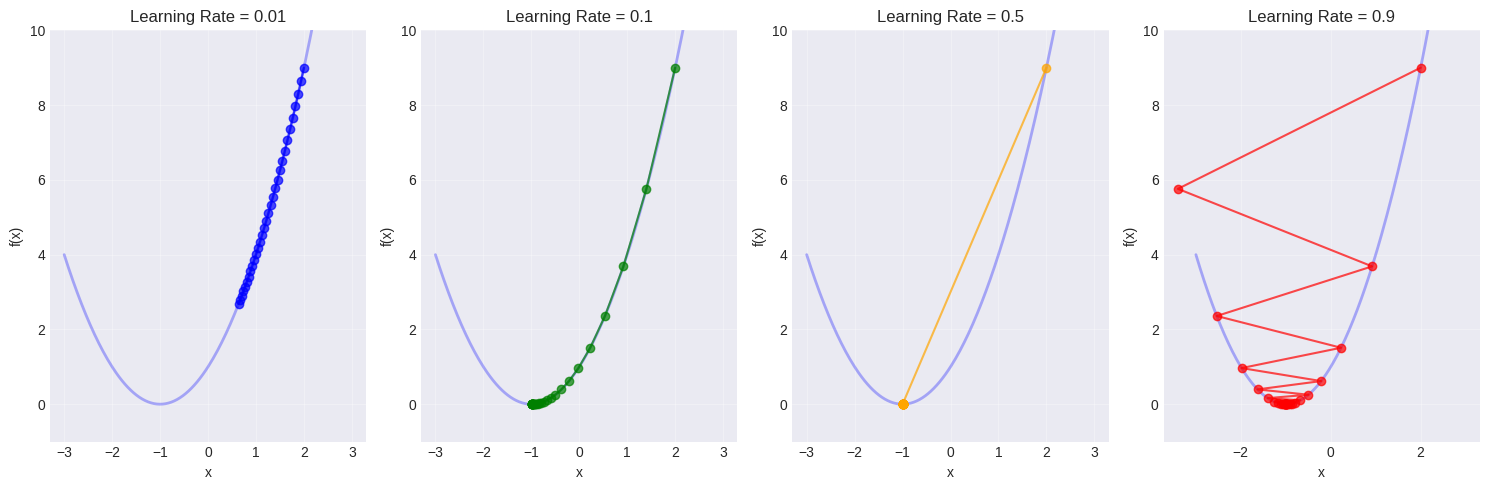

In [32]:
# Experiment with different learning rates on Function 1
learning_rates = [0.01, 0.1, 0.5, 0.9]
colors = ['blue', 'green', 'orange', 'red']

if gradient_descent_1d is not None and f1 is not None:
    plt.figure(figsize=(15, 5))

    for i, lr in enumerate(learning_rates):
        plt.subplot(1, len(learning_rates), i+1)

        # Run gradient descent
        final_x, trajectory = gradient_descent_1d(f1, grad_f1, x0=2.0,
                                                  learning_rate=lr,
                                                  n_iterations=30)

        if trajectory is not None:
            # Plot function
            x_plot = np.linspace(-3, 3, 200)
            y_plot = [f1(x) for x in x_plot]
            plt.plot(x_plot, y_plot, 'b-', alpha=0.3, linewidth=2)

            # Plot trajectory
            traj_y = [f1(x) for x in trajectory]
            plt.plot(trajectory, traj_y, 'o-', color=colors[i],
                    markersize=6, linewidth=1.5, alpha=0.7)

            plt.title(f'Learning Rate = {lr}', fontsize=12)
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.grid(True, alpha=0.3)
            plt.ylim(-1, 10)

    plt.tight_layout()
    plt.show()

In [29]:
# TODO: Find optimal learning rates for each function
# Experiment with different learning rates and record which works best

# For Function 1 (Convex Quadratic)
optimal_lr_f1 = None  # TODO: Set the learning rate that converges fastest without overshooting

# For Function 2 (Non-Convex Cubic)
optimal_lr_f2 = None  # TODO: Set a learning rate that finds a local minimum

# For Function 3 (2D Convex)
optimal_lr_f3 = None  # TODO: Set the learning rate that converges efficiently

print(f"Optimal learning rate for f1: {optimal_lr_f1}")
print(f"Optimal learning rate for f2: {optimal_lr_f2}")
print(f"Optimal learning rate for f3: {optimal_lr_f3}")

Optimal learning rate for f1: 0.5
Optimal learning rate for f2: None
Optimal learning rate for f3: None


In [30]:
# Test Section 4: Learning Rate Optimization
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 4: Learning Rate Experiments"]]
test_runner.test_section("Section 4: Learning Rate Experiments", validator, section_tests, locals())


Testing: Section 4: Learning Rate Experiments
❌ Testing optimal learning rate for function 1: Unexpected error: Exercise2Validator.test_optimal_lr_f1() missing 1 required positional argument: 'optimal_lr_f1'
❌ Testing optimal learning rate for function 2: Unexpected error: Exercise2Validator.test_optimal_lr_f2() missing 1 required positional argument: 'optimal_lr_f2'
❌ Testing optimal learning rate for function 3: Unexpected error: Exercise2Validator.test_optimal_lr_f3() missing 1 required positional argument: 'optimal_lr_f3'

❌ Section 4: Learning Rate Experiments - Some tests failed. Review the errors above.


False

## Section 5: Convergence Analysis

Let's analyze how different starting points affect convergence, especially for non-convex functions.

OverflowError: (34, 'Numerical result out of range')

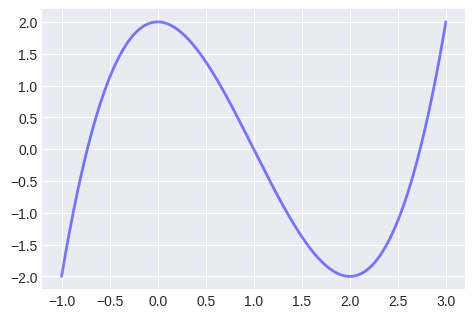

In [35]:
# Experiment with different starting points on Function 2 (Non-Convex)
starting_points = [-0.5, 0.5, 1.5, 2.5]

if gradient_descent_1d is not None and f2 is not None:
    plt.figure(figsize=(12, 8))

    # Plot the function
    x_plot = np.linspace(-1, 3, 200)
    y_plot = [f2(x) for x in x_plot]

    for i, x0 in enumerate(starting_points):
        plt.subplot(2, 2, i+1)
        plt.plot(x_plot, y_plot, 'b-', linewidth=2, alpha=0.5)

        # Run gradient descent
        final_x, trajectory = gradient_descent_1d(f2, grad_f2, x0=x0,
                                                  learning_rate=0.1,
                                                  n_iterations=50)

        if trajectory is not None:
            traj_y = [f2(x) for x in trajectory]
            plt.plot(trajectory, traj_y, 'ro-', markersize=6,
                    linewidth=1.5, alpha=0.7)
            plt.plot(trajectory[0], traj_y[0], 'go', markersize=10)
            plt.plot(trajectory[-1], traj_y[-1], 'r*', markersize=12)

            plt.title(f'Start: x={x0}, End: x={final_x:.2f}', fontsize=11)
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.grid(True, alpha=0.3)

    plt.suptitle('Effect of Starting Points on Non-Convex Function', fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
# TODO: Implement convergence checking
def check_convergence(trajectory: List[float], threshold: float = 1e-6) -> int:
    """
    Check when the optimization has converged

    Args:
        trajectory: List of positions during optimization
        threshold: Convergence threshold for position change

    Returns:
        Iteration number where convergence occurred (-1 if not converged)
    """
    # TODO: Check consecutive positions in trajectory
    # Return the iteration where |x[i+1] - x[i]| < threshold
    # Return -1 if never converged

    return None

# Test convergence checking
if check_convergence is not None and gradient_descent_1d is not None:
    _, test_traj = gradient_descent_1d(f1, grad_f1, x0=2.0,
                                       learning_rate=0.1, n_iterations=100)
    if test_traj is not None:
        convergence_iter = check_convergence(test_traj, threshold=1e-4)
        print(f"Converged at iteration: {convergence_iter}")

In [ ]:
# Test Section 5: Convergence Analysis
section_tests = [(getattr(validator, name), desc) for name, desc in EXERCISE2_SECTIONS["Section 5: Convergence Analysis"]]
test_runner.test_section("Section 5: Convergence Analysis", validator, section_tests, locals())

## Interactive Exploration

Use this section to experiment with different parameters and see how they affect optimization.

In [ ]:
# Interactive function to experiment with parameters
def run_experiment(function_choice: str, x0: float, learning_rate: float, n_iterations: int):
    """Run gradient descent experiment with visualization"""

    if function_choice == "f1" and f1 is not None and gradient_descent_1d is not None:
        final_x, trajectory = gradient_descent_1d(f1, grad_f1, x0, learning_rate, n_iterations)
        if trajectory is not None:
            plot_1d_function(f1, (-4, 2), trajectory,
                           f"Function 1 - LR={learning_rate}, Start={x0}")
            print(f"Final position: {final_x:.4f} (Target: -1.0)")

    elif function_choice == "f2" and f2 is not None and gradient_descent_1d is not None:
        final_x, trajectory = gradient_descent_1d(f2, grad_f2, x0, learning_rate, n_iterations)
        if trajectory is not None:
            plot_1d_function(f2, (-1, 3), trajectory,
                           f"Function 2 - LR={learning_rate}, Start={x0}")
            print(f"Final position: {final_x:.4f}")

# Try different experiments
print("Experiment 1: Good learning rate")
run_experiment("f1", x0=2.0, learning_rate=0.3, n_iterations=30)

print("\nExperiment 2: Too small learning rate")
run_experiment("f1", x0=2.0, learning_rate=0.01, n_iterations=30)

print("\nExperiment 3: Non-convex function")
run_experiment("f2", x0=2.5, learning_rate=0.1, n_iterations=50)

In [ ]:
# 2D optimization visualization
if gradient_descent_nd is not None and f3 is not None:
    # Try different starting points
    starting_points_2d = [
        np.array([2.0, 2.0]),
        np.array([-2.0, -1.0]),
        np.array([1.0, -1.0])
    ]

    for i, x0 in enumerate(starting_points_2d):
        final_x, trajectory = gradient_descent_nd(f3, grad_f3, x0,
                                                  learning_rate=0.2,
                                                  n_iterations=30)
        if trajectory is not None:
            trajectory = np.array(trajectory)
            plot_2d_function(f3, (-3, 2), (-2, 3), trajectory,
                           f"2D Optimization - Start: [{x0[0]:.1f}, {x0[1]:.1f}]")
            print(f"Start: {x0}, Final: {final_x}, Target: [-1, 1]\n")

In [ ]:
# Display final summary of all tests
test_runner.final_summary()